In [148]:
#!zip -r TS_harm_anthro.zip TS_harm_anthro

In [149]:
import netCDF4
from netCDF4 import Dataset as nc
from netCDF4 import num2date

## Load in Dependencies 

In [150]:
import xarray as xr
import numpy as np
#import cftime
import pandas as pd
from numpy import *
from scipy import stats
import datetime
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt #python plotting package
from matplotlib import cm
import matplotlib.colors as mcolors
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import nctoolkit
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cpf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import geometry
from collections  import namedtuple
from shapely.geometry.polygon import LinearRing
from shapely.geometry.polygon import Polygon

## Plotting Parameters 

In [151]:
#PWC Index 
def pwci(p):
    #p = c.groupby('time.month').mean('time')
    east=  p.sel(lat=slice(-5,5), lon=slice(180,260))  # 
    west = p.sel(lat=slice(-5,5), lon=slice(130,150))
    avg_east = east.mean(('lat', 'lon'))
    avg_west = west.mean(('lat', 'lon'))
    pwc = (avg_east - avg_west).compute()
    pwc= pwc.compute()
    return pwc, avg_east, avg_west

In [152]:
# Set for each variable
variable = 'Surface Temperature'
unit = ' C'
plt_ylabel = "Surface Temperature (C)"
vari ='/TS'

In [153]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colors = ['red', 'green', 'blue', 'black']
var_names = ['DJF', 'MAM', 'JJA', 'SON']#, 'ANTHRO']'LULC'
colors = ['red','green','blue','orange']#,'black']
var_name = ['Full Forcing', 'GHG','Ozone-Aerosol', 'Land Use/Land Cover']#, 'Anthro']

In [154]:
## Make geom for E and W PWC index boxes
Elats = [-5, -5, 5, 5]
Elons = [90, 150, 150,90]
Ering = LinearRing(list(zip(Elons, Elats)))
Wlats = [-5, -5, 5, 5]
Wlons = [-150,-90,-90,-150]
Wring = LinearRing(list(zip(Wlons, Wlats)))

## Create vartiables to plot pwc timeseries

In [155]:
# CESM converting month 01 to January 
from itertools import product
from cftime import DatetimeNoLeap
year = np.linspace(0,1872, 1872) # (0, length of dataset(12*# of years), lnegth of dataset) 
dates = [DatetimeNoLeap(year, month, 1) for year, month in product(range(1850, 2006), range(1, 13))]
da = xr.DataArray(np.arange(1872), coords=[dates], dims=['time'], name='time')

In [156]:
def weights(w):
    coslat = np.cos(np.deg2rad(w.lat)) #  Take the cosine of latitude (first converting to radians)
    weight_factor = coslat / coslat.mean(dim='lat')#  And divide by its mean value
    computed_weight = w * weight_factor # .mean(dim=('time', 'lon', 'lat'))
    return computed_weight

In [157]:
## Calculate Ensemble average 
def ensav(e):
    ens_avg = e.mean(dim = 'ensemble')
    return ens_avg

In [158]:
def clim_plot(c,a):
    cl = ensav(c[i])
    an = ensav(a[i])
    ax = fig.add_subplot(4,2, i+1)
    plt.plot(np.arange(cl.size), cl,  label='Climatology')
    plt.plot(np.arange(an.size),an,  label='Anomalies')
    plt.rcParams['font.size'] = '14'

In [159]:
# Code Dr. Samantha Stevenson UCSB
#mask_lon = (mytos.lon >= regbox[2]) & (mytos.lon <= regbox[3])
#mask_lat = (mytos.lat >= regbox[0]) & (mytos.lat <= regbox[1])
#hsst=mytos.where(mask_lon & mask_lat, drop=True).squeeze()

# Read in Files

In [160]:
import os
cwd = os.getcwd()

In [161]:
import netCDF4

In [162]:
import nctoolkit as nc
import os
cwd = os.getcwd() # get current directory 
def din(f): # fn = filename
    di =[]
    fp=cwd+ f+ '.nc'
    data = xr.open_dataset(fp)
    da = data.to_dataarray()
    return da

# Here you will read in different net cdfs, this will help me show you how to work with:
- lists 
- for loops
- plotting 

In [163]:
# use din to read netcdf and make it into xr data array 
# if this does not work just read in 4 netcdfs and convert them to xr data array
var1 = din('/TSfull')

## Create vartiables to plot pwc timeseries

In [164]:
colors = ['red','green','blue','orange']#,'black']
var_name = ['Full Forcing', 'GHG','Ozone-Aerosol', 'Land Use/Land Cover']#, 'Anthro']

In [165]:
## Get the lengths of lat, lon and time
nlon=len(var1.lon)
nlat=len(var1.lat)
ntime=len(var1.time)
ntime_post = len(var1.time)
time = var1.time
lon = var1.lon
lat = var1.lat


post_time = var1.time
tlen = len(var1[0])
tlen_post = len(var1[0])
dt = 1/12  # In years sampling frequency 
t_post = np.arange(0,1872)*dt +1850 # np.argange(0, length of time series)* sampling freuqnecuy + start year 
t_seas_oza = np.arange(0, 156) +1850 # Seasonal so 1872/ 4 seasons

#Make new time variable (CESM issue) 
from itertools import product
from cftime import DatetimeNoLeap
dates = [DatetimeNoLeap(year, month, 1) for year, month in product(range(1850, 2006), range(1, 13))]
da = xr.DataArray(np.arange(1872), coords=[dates], dims=['time'], name='time')
ord_time = da.swap_dims({'time': 'ordinal_day'})
year = np.linspace(0,1872, 1872) 

In [166]:
## Create time variables to calculate annual mean SLP
mo=12
yr=ntime//mo
post_yr = ntime_post//mo
post_year=linspace(1850,2005,156)

# calculate Climatology

In [167]:
## Climatology Definition 
def clim(c): 
    clim_var = c.groupby('time.month').mean('time')
    anom_var = c.groupby('time.month') - clim_var
    anom_var= anom_var.compute()
    return anom_var

In [106]:
%%time
anom_full = clim(var1)

CPU times: user 42.5 ms, sys: 3.35 ms, total: 45.8 ms
Wall time: 44.2 ms


# Calculate PWC index Anomalgies calcualted relative to climatolofy

In [107]:
%%time
full, full_east, full_west  = pwci(anom_full)

CPU times: user 6.3 ms, sys: 1.61 ms, total: 7.91 ms
Wall time: 5.98 ms


# Linear Trend Per Decade with Significance Stippling

## Define Linear Function

In [122]:
def l_trend(var,lon,lat,time,sig):
    vt =[]
    vp =[]
    nlon=len(lon)
    nlat=len(lat)
    nt=len(time)
    vart=zeros(nlat*nlon)
    varp=zeros(nlat*nlon)
    if len(var.shape)== 3:        
        var1=reshape(var,(nt,nlat*nlon)) #nlat *nlon to calculate 
        for i in range(nlat*nlon):
            v=var1[:,i]  
            vart[i], intercept, r_value, varp[i], std_err=stats.linregress(time,v) # slope, intercept, r, p, std_error
        vart=reshape(vart,(nlat,nlon))
        varp=reshape(varp,(nlat,nlon)) 
        vt.append(vart)
        vp.append(varp)
        #print(type(vp))
        slope = np.stack(vt, axis=0)#, dim='ensemble')
        #print(len(slope))
        #print(slope)
        pvalue = np.stack(vp, axis=0)#, dim='ensemble')
        #pvs= stats.combine_pvalues(pvalue[0], method='fisher', weights=None)
        ## To convert the  trend from monthly to ppm/decade, just multiply by 
        ## 12 months per year, and then multiply that by 10 years per decade
        slope_avg = ((slope))*12*10
        sig_pval = ma.masked_greater(pvalue, sig)
        pval_avg = (sig_pval)
        return (slope_avg, pval_avg)

## Calculate Linear Function

In [126]:
trend, sig_trend = l_trend(anom_full[:,:,:].values,lon,lat,year,sig=0.05)

## PLot Linear Function

In [125]:
df = 35 
t90=stats.t.ppf(1-0.05, df-2)
t95=stats.t.ppf(1-0.025, df-2)
varplot = ' Linear Trend Per Decade'

In [130]:
def lt_plot(ep,vx):
    fig = plt.figure(figsize=(9,10))
    fig.dpi = 600
    clevs = np.arange(-1.05, 1.05, 0.05)
    dx = []
    for i in np.arange(len(ep)):
        ax = plt.subplot(2, 2, i+1, projection=ccrs.PlateCarree(central_longitude=-179.5))
        ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree(central_longitude=-179.5))
        cf = ax.pcolormesh(lon, lat, ep[i], transform=ccrs.PlateCarree(),cmap='seismic', shading='gouraud',
                           vmin = -.1, vmax =.1)
        cs = ax.contourf(lon,lat, vx[i], colors='none' ,hatches=[".."],extend='lower', transform=ccrs.PlateCarree())

        ax.coastlines(linewidths=1.0)
        ax.set_aspect('equal')
        ax.set_extent([75, 290, -31, 31], crs=ccrs.PlateCarree())
        fig.suptitle(variable +varplot , fontsize = 14, y= 0.72)
        ax.set_title( var_name[i] ,fontsize=12)
        #ax.text(-20,25,'Variance Explained {:.1f} %'.format(vx[i]),fontsize=9,backgroundcolor='white',horizontalalignment="right", verticalalignment ='bottom')
        ## Add in meridian and parallels
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='black', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.left_labels= True
        gl.xlines = False
        gl.ylines = True
        gl.xlocator = mticker.FixedLocator([-90, -135, 180, 135, 90])
        gl.ylocator = mticker.FixedLocator([-30, -15, 0, 15, 30])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 25, 'color': 'gray'}
        gl.xlabel_style = {'size': 12.5,'color': 'black', 'weight': 'bold'}
        gl.ylabel_style = {'size': 25, 'color': 'gray'}
        gl.ylabel_style = {'size': 12.5,'color': 'black', 'weight': 'bold'}
        ax.add_geometries([Ering], ccrs.PlateCarree(), facecolor='none', edgecolor='dimgrey', linewidth=2.5)
        ax.add_geometries([Wring], ccrs.PlateCarree(), facecolor='none', edgecolor='dimgrey', linewidth =2.5)
        gl.xlabel_style = {'size': 10}
        gl.ylabel_style = {'size': 10}
    # # add colorbar [left, bottom, width, height]
        ax2 = fig.add_axes([0.15, 0.22, 0.75, 0.03])
        cbar = fig.colorbar(cf, cax=ax2, drawedges=False, 
                        orientation='horizontal', extend='both')
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label(variable +unit, fontsize=10)
        plt.subplots_adjust(hspace=-0.5, wspace=0.85)
        plt.tight_layout()
        plt.savefig(variable + "lt.jpg")

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


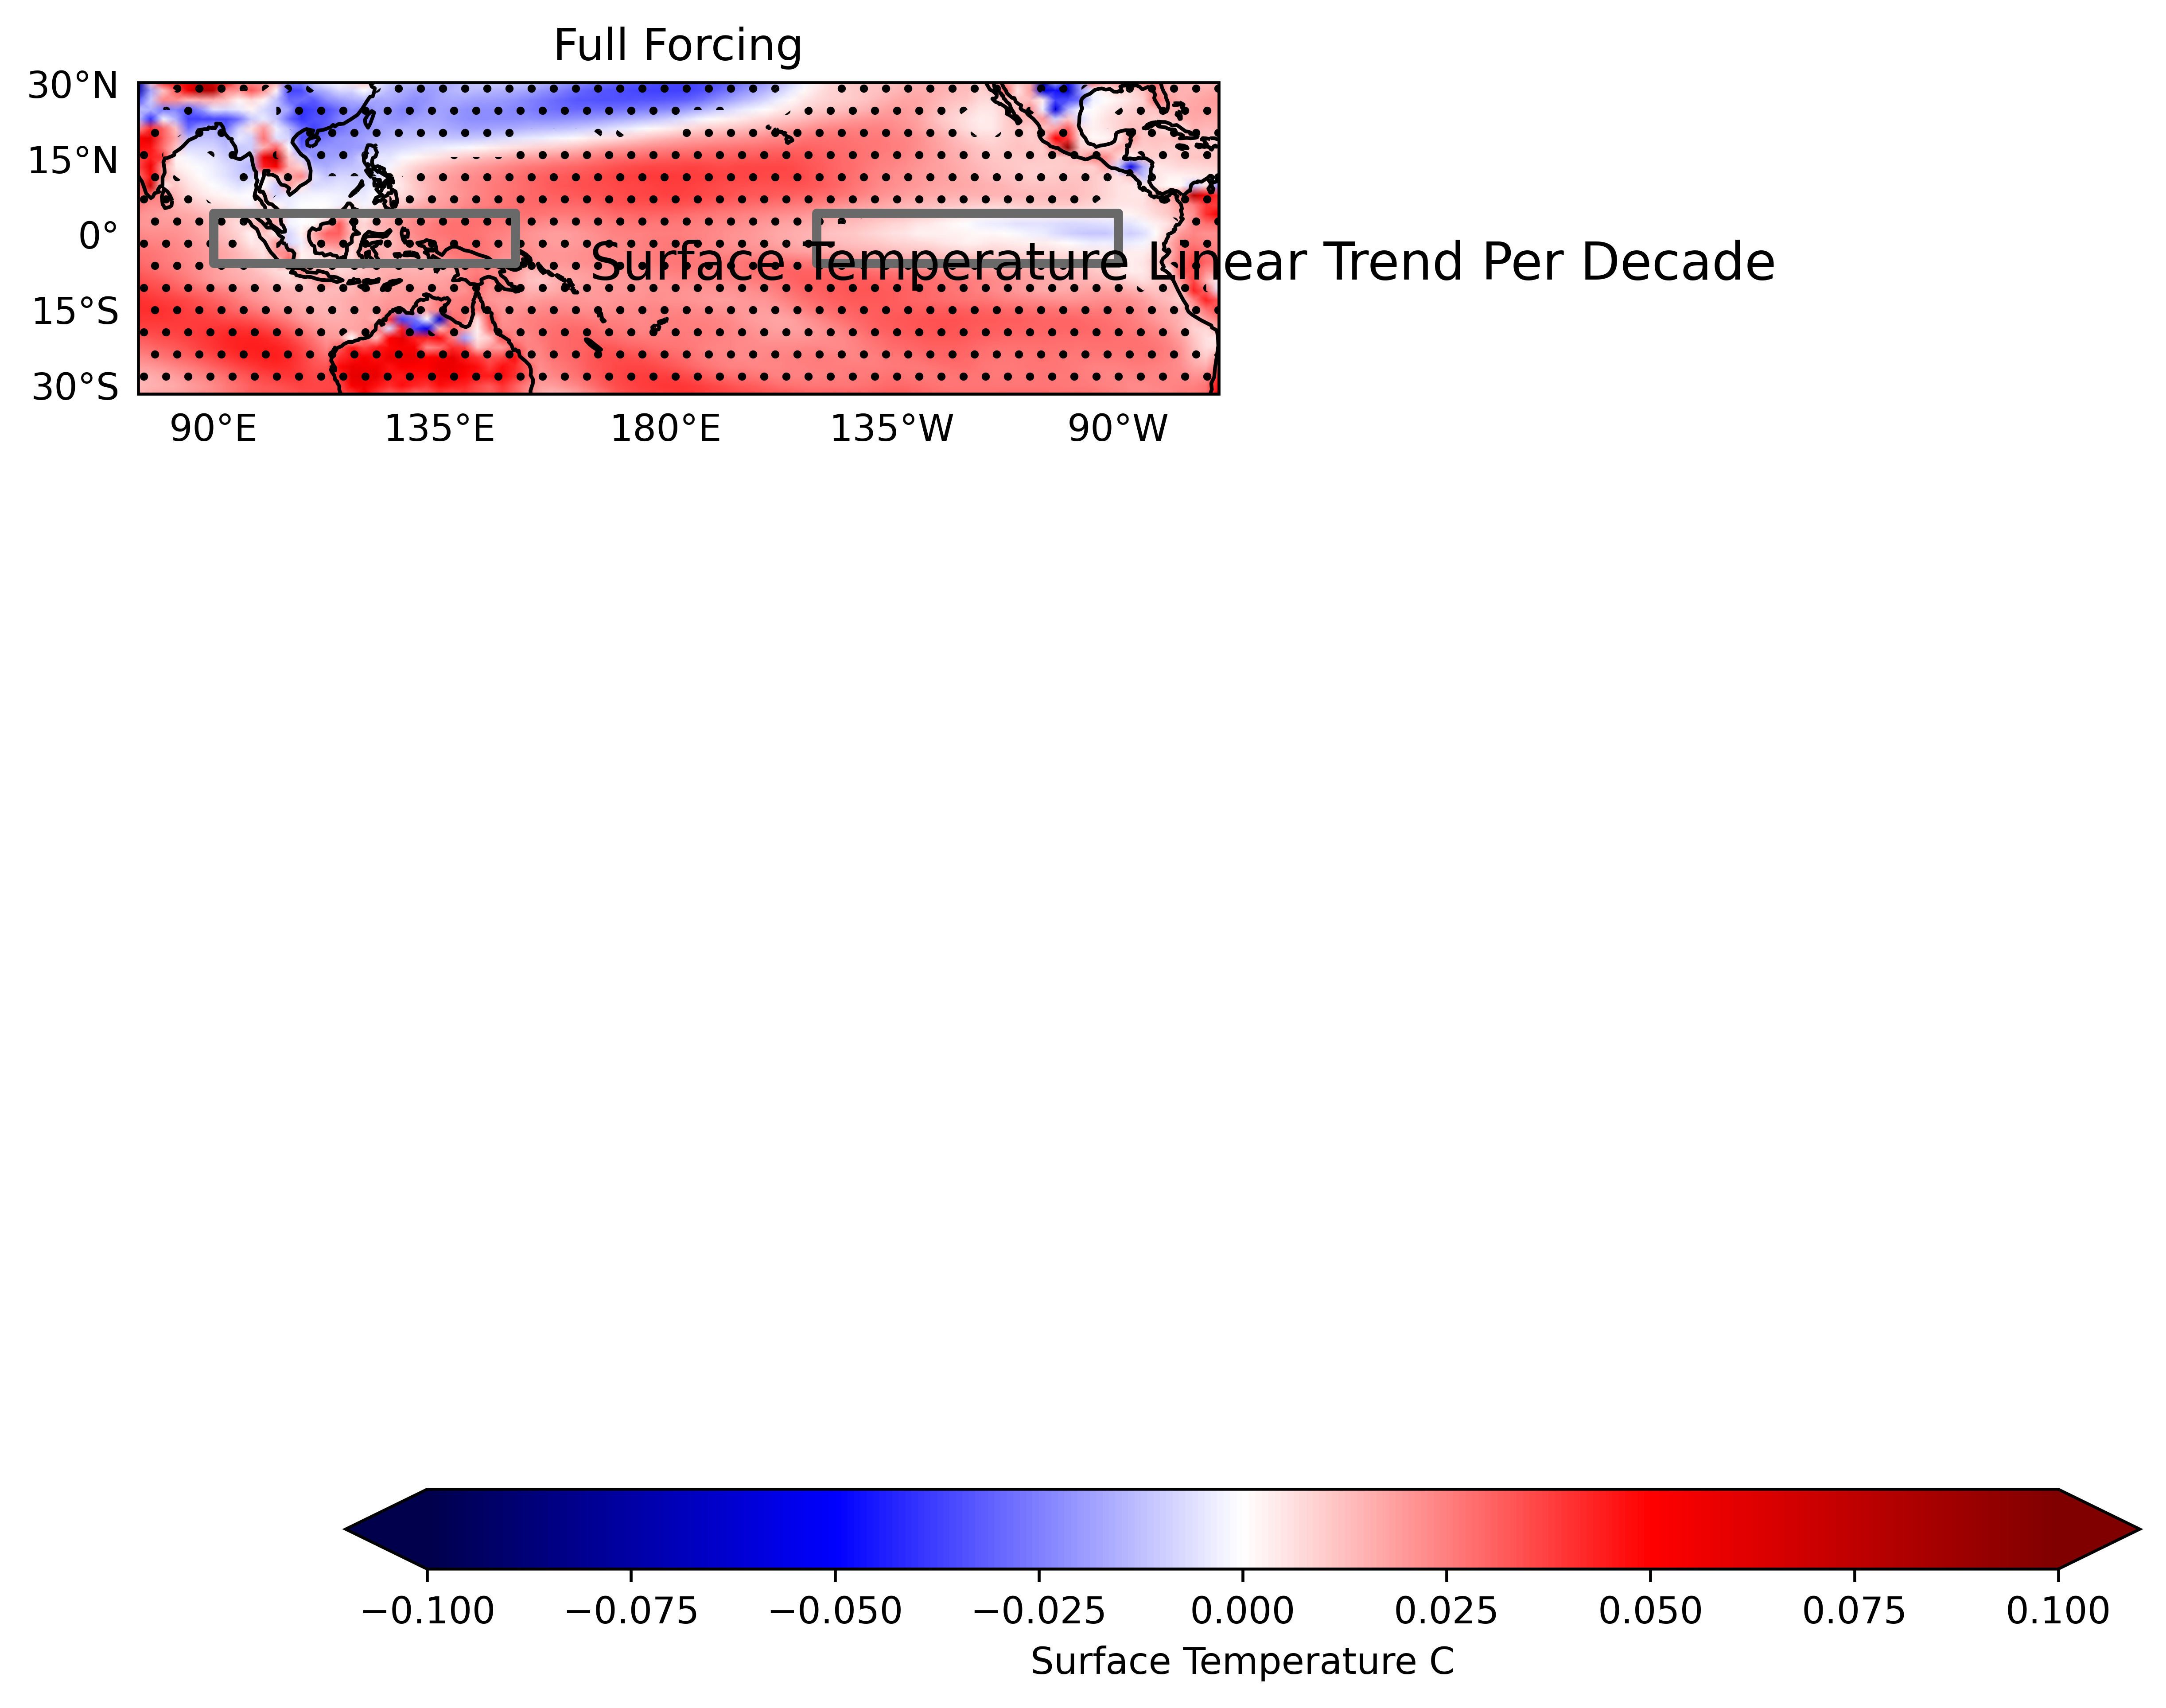

In [131]:
lt_plot(trend, sig_trend)

# Season Plotting

## Season Function

In [132]:
def season(m):
    dj =[]
    ma =[]
    jj =[]
    so =[]
    DA_DJF = m.sel(time=m.time.dt.season=="DJF")
    DA_MAM = m.sel(time=m.time.dt.season=="MAM")
    DA_JJA = m.sel(time=m.time.dt.season=="JJA")
    DA_SON = m.sel(time=m.time.dt.season=="SON")
    return DA_DJF, DA_MAM, DA_JJA, DA_SON

In [133]:
def year_v(yv): #redo year
    lt = len(yv[0])
    yr = np.linspace(0,lt, lt) 
    return(yr)

In [134]:
#yearsea= year_v(ozasea[0])
def se(b):
    ss = season(b)
    for ww in range(len(ss[0])):
        d, dp = l_trend(ss[0][ww,:,:,:].values,lon,lat,yearsea,sig=0.05)
        m, mp = l_trend(ss[1][ww,:,:,:].values,lon,lat,yearsea,sig=0.05)
        j, jp = l_trend(ss[2][ww,:,:,:].values,lon,lat,yearsea,sig=0.05)
        s, sp = l_trend(ss[3][ww,:,:,:].values,lon,lat,yearsea,sig=0.05)
        seas = [d,m,j,s]
        seasp = [dp,mp,jp,sp]
        lent = len(seas)
    seas_plot(seas, seasp)
    return seas_plot

# Calculate PWC index Regaular Climatology 

In [135]:
%%time
pwc, pwc_east, pwc_west = pwci(anom_full)

CPU times: user 6.87 ms, sys: 1.81 ms, total: 8.68 ms
Wall time: 6.34 ms


In [136]:
def ensav(e):
    ensav = e.mean(dim = 'ensemble')
    return ensav

In [137]:
pwc_ts = (pwc)

# Time Series

In [138]:
t_oza = np.arange(0,1872)*dt +1850
def roll_post(r):
    ax = fig.add_subplot(6,1,i+1)
    post = r[i].sel(time = slice('1850-01-01', '2005-12-01'))
    res = stats.linregress(t_oza,post)
    roll_avg = post.rolling(time=180, center=True).mean()
    ax.set_title(names[i])
   # ax.set_ylim([-.4,.4])
    plt.rcParams['font.size'] = '16'
    plt.plot(t_oza,roll_avg, label = names[i])
    plt.plot(t_oza, (res.intercept + res.slope*t_oza), 'r')
    plt.text(1850, -0.3, 'Slope = %0.6f' %res.slope)
    plt.ylabel('d18O (per mill)')

In [139]:
import numpy as np 
t_oza = np.arange(0,1872)*dt +1850

In [142]:
def roll_post(r,vp):
    fig = plt.figure(figsize=(20,10))
    for i in range(len(r)):
        #ax = fig.add_subplot(6,1,i+1)
        post = r #[i].mean(dim = 'ensemble')
        res = stats.linregress(t_oza,post)
        roll_avg = post.rolling(time=120, center=True).mean()
        #plt.set_title(var_name[i]) #ax
        plt.suptitle(variable +vp , fontsize = 40, y= 0.99)
        #plt.set_ylim([-2,.2]) #ax
        plt.ylim(-0.75,0.75)
        plt.plot(t_oza,roll_avg, label = var_name[i])
        #plt.plot(t_oza, (res.intercept + res.slope*t_oza), 'r')
        #plt.text(1850, -0.3, 'Slope Pre = %0.6f' %res.slope)
        plt.ylabel(variable+', '  +unit)
        plt.xlabel('Year')
        plt.rcParams['font.family']= 'sans-serif'
        plt.rcParams['font.size'] = '30'
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=4)
        #plt.tight_layout()
        plt.xlabel('Year', fontsize = '38')
        plt.savefig(variable+vp + ".jpg")

IndexError: list index out of range

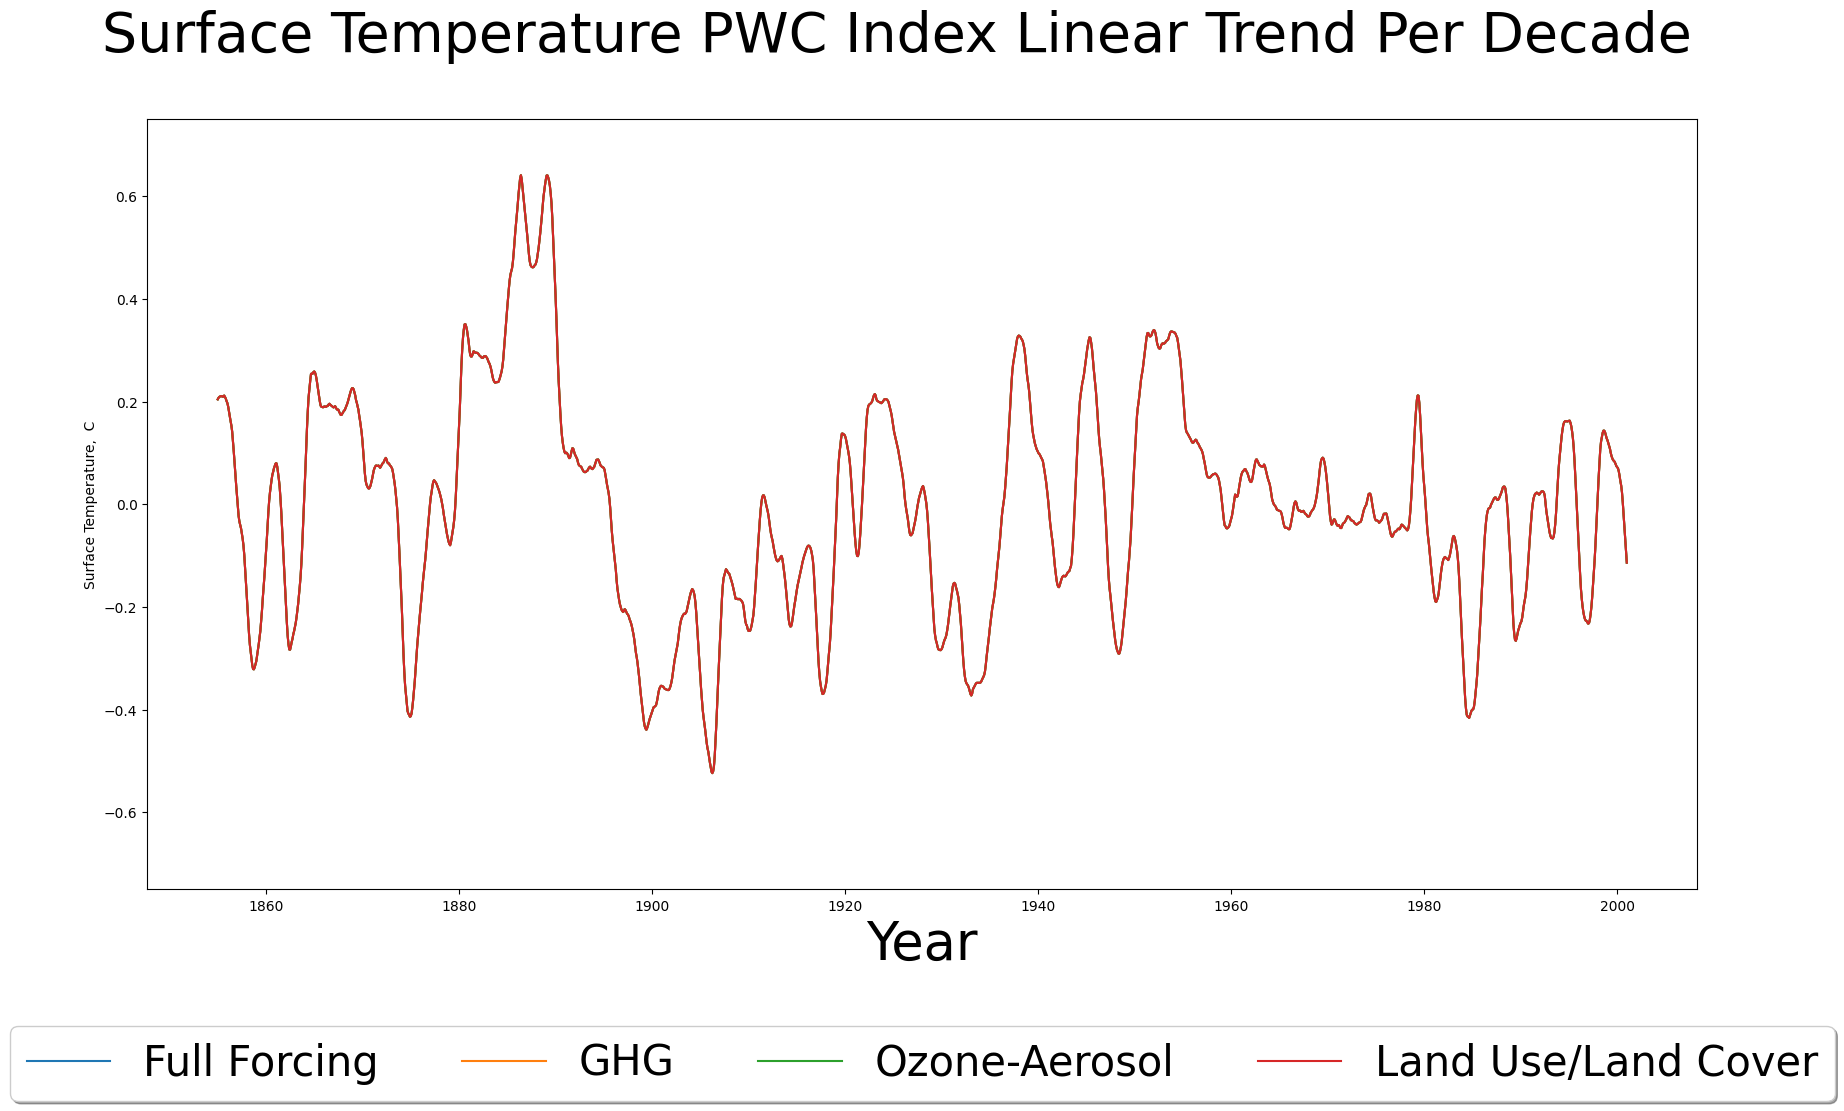

In [143]:
#for i in range(len(pwc_in)):
vp =  ' PWC Index Linear Trend Per Decade'
roll_post(pwc, vp)